# Importar libreria y datos

In [1]:
from collections import Counter

import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import ast


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/dataset_oficial.csv')

df.head()

,uuid,company,title,position,province,city,date_of_birth,last_register,years_experience,skills,final_salary
0,798639f1-3c92-4cef-8727-a97e200eb82b,STUDIO 21,PROFESOR DE INFORMÁTICA | Customer Service Rep...,Técnico de Soporte,Madrid,MADRID,1974-08-28T00:00:00.000Z,2024-09-26,3.966667,NaN,18000.0
1,9f71f46a-b5b5-41af-ab8b-08af20ddff42,SOL MELIA,Analista de Sistemas | CONSULTOR SENIOR SAP |...,Consultor ERP,Islas Baleares,Palma,1974-03-24T00:00:00.000Z,2010-11-21,23.227778,NaN,21000.0
2,68cee060-35ee-4e64-b66f-0ac56c6b6bca,"Grupo Ferrovial, S.A.",Gerente de Sistemas de Informacion. Dpto. Inte...,Jefe de Proyecto,Madrid,Madrid,1966-10-08T00:00:00.000Z,2018-09-11,21.902778,NaN,42000.0
3,067df379-8731-49c3-8c2c-321b612c0171,Heineken España,Responsable Helpdesk | Servicedesk Manager IT,Jefe de Informática,Sevilla,Sevilla,1968-03-23T00:00:00.000Z,2022-11-08,11.580556,NaN,18000.0
4,c76ce749-9057-456a-acee-b22f0cde50a8,"AseNet Ingenieros, S.L.",Analista | Analista-Programador | Administrado...,Administrador de Bases de Datos,Madrid,Madrid,1969-10-22T00:00:00.000Z,2013-06-17,15.811111,NaN,36000.0


In [3]:
df.columns

Index(['uuid', 'company', 'title', 'position', 'province', 'city',
       'date_of_birth', 'last_register', 'years_experience', 'skills',
       'final_salary'],
      dtype='object')

# EDA

## General

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13948 entries, 0 to 13947
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uuid              13948 non-null  object 
 1   company           13731 non-null  object 
 2   title             13937 non-null  object 
 3   position          13948 non-null  object 
 4   province          13948 non-null  object 
 5   city              13138 non-null  object 
 6   date_of_birth     13948 non-null  object 
 7   last_register     13948 non-null  object 
 8   years_experience  13948 non-null  float64
 9   skills            5344 non-null   object 
 10  final_salary      6376 non-null   float64
dtypes: float64(2), object(9)
memory usage: 1.2+ MB


In [5]:
# Create feature age

df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], format='mixed', errors='coerce')

df['age'] = pd.Timestamp.now().year - df['date_of_birth'].dt.year

In [6]:
# Cambiamos fechas a formato datetime.

df['last_register'] = pd.to_datetime(df['last_register'].str[:10], errors='coerce')

In [7]:
# We create days since last register feature. Possibly relevant for estimating salary.

reference = df['last_register'].max() + pd.Timedelta(days=1) # my reference will be that last date + 1 day.

df['days_last_register'] = (reference - df['last_register']).dt.days # get days since last register using today as reference.

In [8]:
df['days_last_register']

0         117
1        5175
2        2324
3         805
4        4236
         ... 
13943      31
13944      26
13945      54
13946      30
13947       4
Name: days_last_register, Length: 13948, dtype: int64

In [9]:
df.head()

,uuid,company,title,position,province,city,date_of_birth,last_register,years_experience,skills,final_salary,age,days_last_register
0,798639f1-3c92-4cef-8727-a97e200eb82b,STUDIO 21,PROFESOR DE INFORMÁTICA | Customer Service Rep...,Técnico de Soporte,Madrid,MADRID,1974-08-28 00:00:00+00:00,2024-09-26,3.966667,NaN,18000.0,51,117
1,9f71f46a-b5b5-41af-ab8b-08af20ddff42,SOL MELIA,Analista de Sistemas | CONSULTOR SENIOR SAP |...,Consultor ERP,Islas Baleares,Palma,1974-03-24 00:00:00+00:00,2010-11-21,23.227778,NaN,21000.0,51,5175
2,68cee060-35ee-4e64-b66f-0ac56c6b6bca,"Grupo Ferrovial, S.A.",Gerente de Sistemas de Informacion. Dpto. Inte...,Jefe de Proyecto,Madrid,Madrid,1966-10-08 00:00:00+00:00,2018-09-11,21.902778,NaN,42000.0,59,2324
3,067df379-8731-49c3-8c2c-321b612c0171,Heineken España,Responsable Helpdesk | Servicedesk Manager IT,Jefe de Informática,Sevilla,Sevilla,1968-03-23 00:00:00+00:00,2022-11-08,11.580556,NaN,18000.0,57,805
4,c76ce749-9057-456a-acee-b22f0cde50a8,"AseNet Ingenieros, S.L.",Analista | Analista-Programador | Administrado...,Administrador de Bases de Datos,Madrid,Madrid,1969-10-22 00:00:00+00:00,2013-06-17,15.811111,NaN,36000.0,56,4236


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13948 entries, 0 to 13947
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   uuid                13948 non-null  object             
 1   company             13731 non-null  object             
 2   title               13937 non-null  object             
 3   position            13948 non-null  object             
 4   province            13948 non-null  object             
 5   city                13138 non-null  object             
 6   date_of_birth       13948 non-null  datetime64[ns, UTC]
 7   last_register       13948 non-null  datetime64[ns]     
 8   years_experience    13948 non-null  float64            
 9   skills              5344 non-null   object             
 10  final_salary        6376 non-null   float64            
 11  age                 13948 non-null  int32              
 12  days_last_register  13948 non-nu

In [11]:
print(df.isna().sum())

print((df.isna().mean() * 100).round())

uuid                     0
company                217
title                   11
position                 0
province                 0
city                   810
date_of_birth            0
last_register            0
years_experience         0
skills                8604
final_salary          7572
age                      0
days_last_register       0
dtype: int64
uuid                   0.0
company                2.0
title                  0.0
position               0.0
province               0.0
city                   6.0
date_of_birth          0.0
last_register          0.0
years_experience       0.0
skills                62.0
final_salary          54.0
age                    0.0
days_last_register     0.0
dtype: float64


## Univariate Analysis

### Numerical features

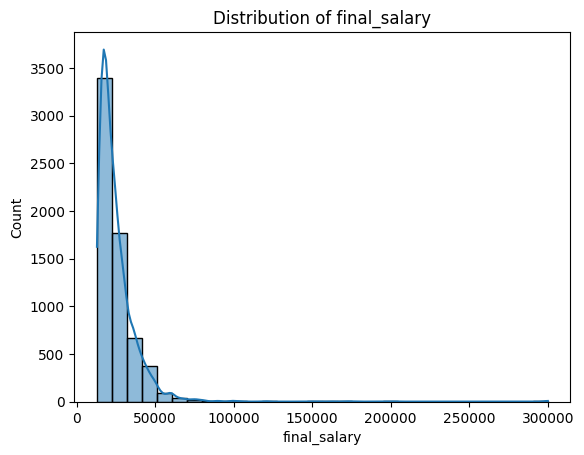

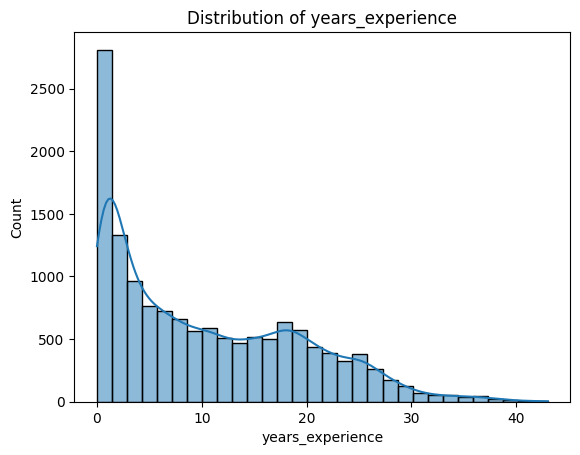

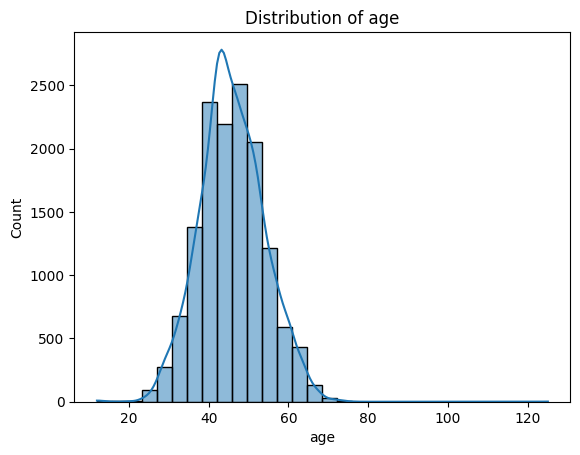

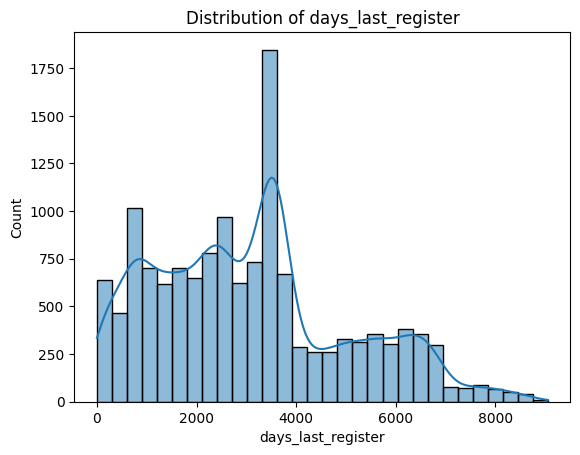


Descriptive statistics:

                      count          mean           std      min  \
final_salary         6376.0  25156.524467  13492.991869  13000.0   
years_experience    13948.0     10.317576      9.015014      0.0   
age                 13948.0     45.888514      8.121689     12.0   
days_last_register  13948.0   3062.138443   1939.890848      1.0   

                             25%           50%       75%            max  
final_salary        18000.000000  21000.000000  30000.00  300000.000000  
years_experience        2.033333      7.947222     17.40      43.016667  
age                    41.000000     45.000000     51.00     125.000000  
days_last_register   1530.000000   2923.000000   3984.75    9051.000000  


In [12]:
# Continuous variables univariate analysis

col_num = ['final_salary', 'years_experience', 'age', 'days_last_register']

for col in col_num:
    plt.figure()
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Summary stats
print("\nDescriptive statistics:\n")
print(df[col_num].describe().T)

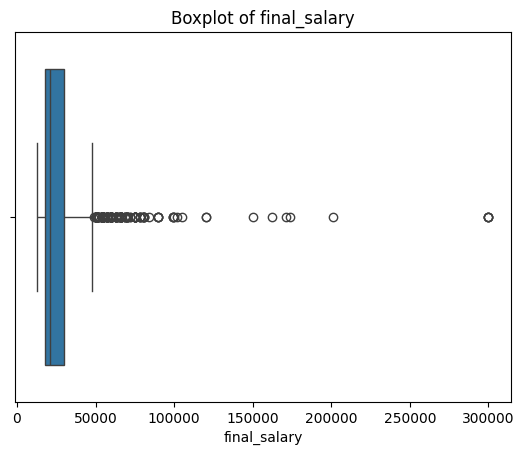

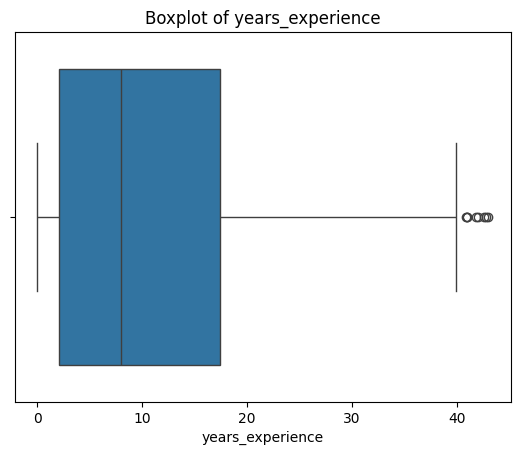

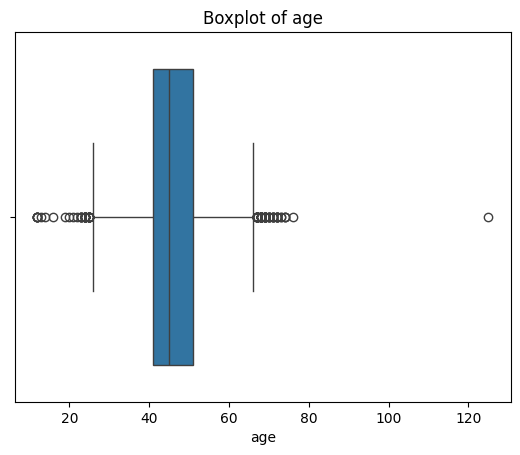

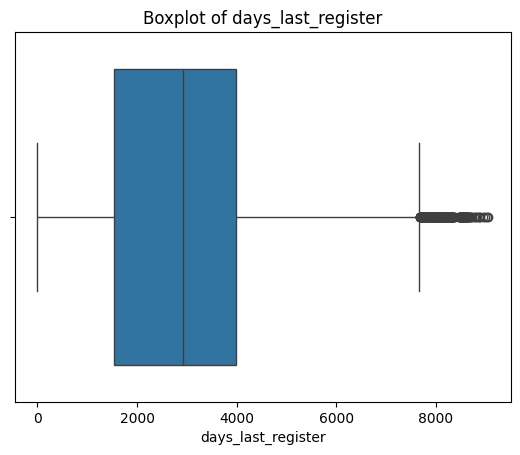

In [13]:
for col in col_num:
    plt.figure()
    sns.boxplot(x=df[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()


In [31]:
# Skewness value

for i in col_num:
    print(f'{i}: {skew(df[i].dropna())}')

final_salary: 7.416553467588333
years_experience: 0.7102157275431691
age: 0.17139083201249714


In [32]:
# Kurtosis value

for i in col_num:
    print(f'{i}: {kurtosis(df[i].dropna())}')

final_salary: 121.13066035999731
years_experience: -0.4448364715543316
age: 0.6355405335033475


**Findings:**
* Clearly salary is extremely unbalanced. With a skew value of 7.41, while other two variables under 0.5. The closer to 0, the more balanced.
  * Additionally, salary has a kurtosis of 121!
* Years of experience is also slightly skewed, with more people with less experience.
* Mode for last register: most last registered aprox. 4k days ago...

### Categorical features

In [14]:
# Categorical variables to explore
col_cat = ['position', 'province', 'city']
total_rows = len(df)

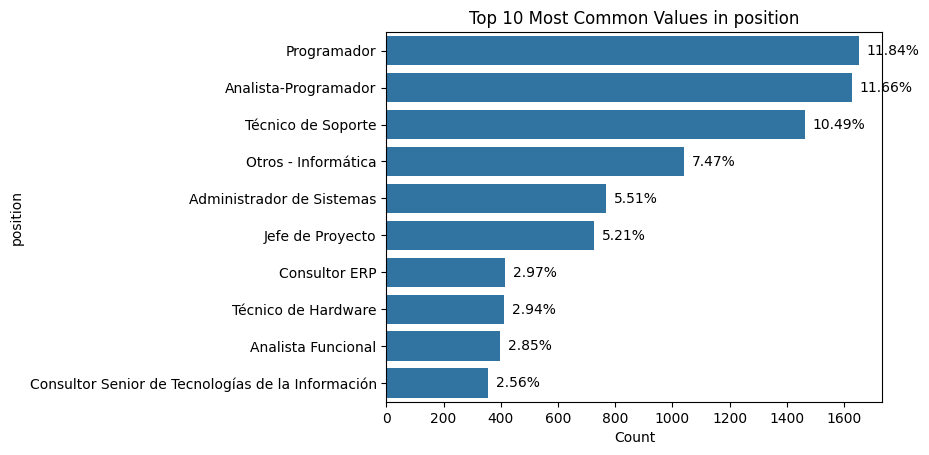


🔡 Top 5 position values:
                                                    Count  Percentage
position                                                            
Programador                                         1652       11.84
Analista-Programador                                1627       11.66
Técnico de Soporte                                  1463       10.49
Otros - Informática                                 1042        7.47
Administrador de Sistemas                            769        5.51
Jefe de Proyecto                                     726        5.21
Consultor ERP                                        414        2.97
Técnico de Hardware                                  410        2.94
Analista Funcional                                   398        2.85
Consultor Senior de Tecnologías de la Información    357        2.56


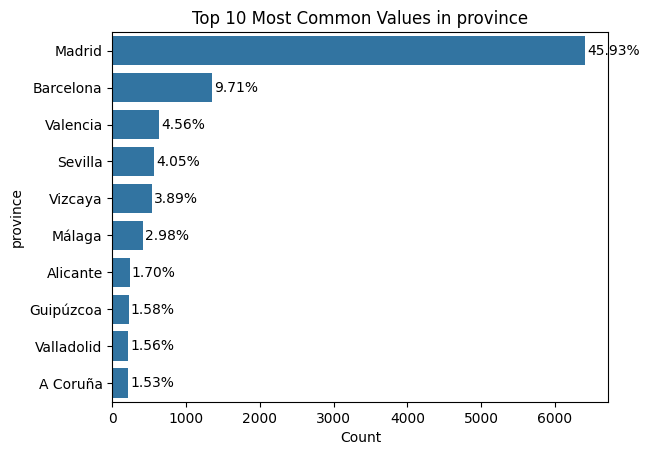


🔡 Top 5 province values:
             Count  Percentage
province                     
Madrid       6407       45.93
Barcelona    1355        9.71
Valencia      636        4.56
Sevilla       565        4.05
Vizcaya       542        3.89
Málaga        416        2.98
Alicante      237        1.70
Guipúzcoa     220        1.58
Valladolid    218        1.56
A Coruña      214        1.53


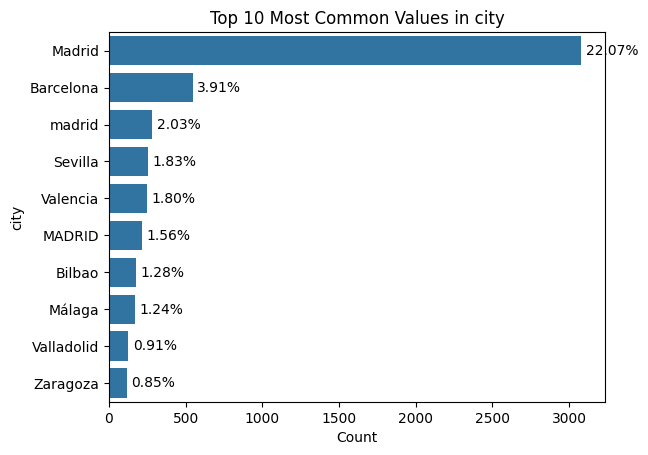


🔡 Top 5 city values:
             Count  Percentage
city                         
Madrid       3079       22.07
Barcelona     546        3.91
madrid        283        2.03
Sevilla       255        1.83
Valencia      251        1.80
MADRID        218        1.56
Bilbao        179        1.28
Málaga        173        1.24
Valladolid    127        0.91
Zaragoza      119        0.85


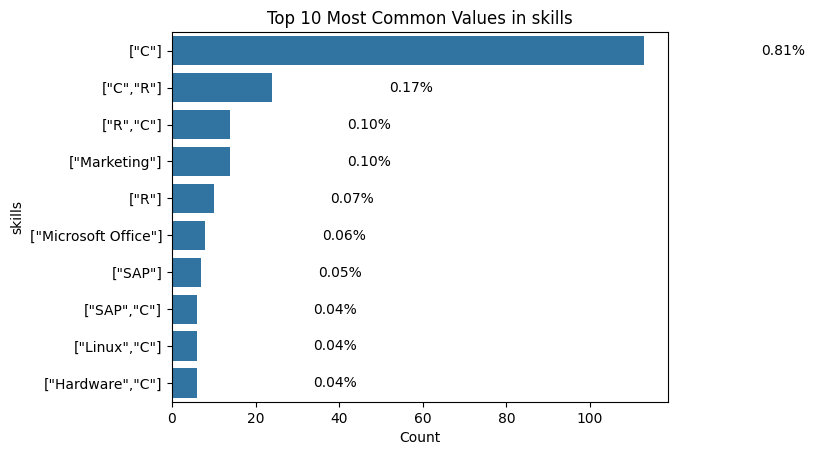


🔡 Top 5 skills values:
                       Count  Percentage
skills                                 
["C"]                   113        0.81
["C","R"]                24        0.17
["R","C"]                14        0.10
["Marketing"]            14        0.10
["R"]                    10        0.07
["Microsoft Office"]      8        0.06
["SAP"]                   7        0.05
["SAP","C"]               6        0.04
["Linux","C"]             6        0.04
["Hardware","C"]          6        0.04


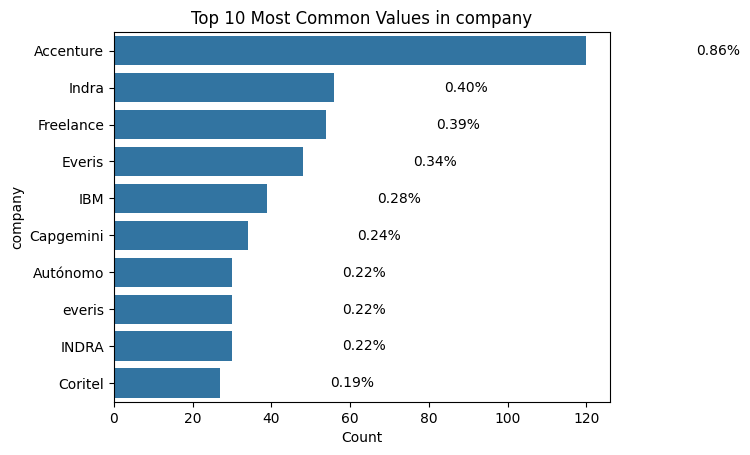


🔡 Top 5 company values:
            Count  Percentage
company                     
Accenture    120        0.86
Indra         56        0.40
Freelance     54        0.39
Everis        48        0.34
IBM           39        0.28
Capgemini     34        0.24
Autónomo      30        0.22
everis        30        0.22
INDRA         30        0.22
Coritel       27        0.19


In [22]:

for col in col_cat:
    plt.figure()
    top = df[col].value_counts().head(10)
    percent = (top / total_rows * 100).round(2)

    ax = sns.barplot(x=top.values, y=top.index)
    plt.title(f"Top 10 Most Common Values in {col}")
    plt.xlabel("Count")
    plt.ylabel(col)

    # Add percentage labels
    for i, (count, pct) in enumerate(zip(top.values, percent)):
        ax.text(count + total_rows * 0.002, i, f"{pct:.2f}%", va='center')

    plt.show()

    print(f"\n🔡 Top 5 {col} values:\n", pd.concat([top, percent], axis=1, keys=['Count', 'Percentage']))


In [23]:
for col in col_cat:
    print(f"{col_cat} → {df[col_cat].nunique()} unique values")

['position', 'province', 'city', 'skills', 'company'] → position      148
province       51
city         2510
skills       5052
company     12103
dtype: int64 unique values
['position', 'province', 'city', 'skills', 'company'] → position      148
province       51
city         2510
skills       5052
company     12103
dtype: int64 unique values
['position', 'province', 'city', 'skills', 'company'] → position      148
province       51
city         2510
skills       5052
company     12103
dtype: int64 unique values
['position', 'province', 'city', 'skills', 'company'] → position      148
province       51
city         2510
skills       5052
company     12103
dtype: int64 unique values
['position', 'province', 'city', 'skills', 'company'] → position      148
province       51
city         2510
skills       5052
company     12103
dtype: int64 unique values


In [24]:
# Count company occurrences
company_counts = df['company'].value_counts()

# Count how many appear only once
single_appearance = (company_counts == 1).sum()

# Total unique companies
total_unique = company_counts.shape[0]

# Percentage
percentage_single = (single_appearance / total_unique) * 100
print(f"{percentage_single:.2f}% of companies appear only once.")


95.90% of companies appear only once.


In [25]:
company_counts = df['company'].value_counts()

more_than_once = (company_counts > 1).sum()
print(f"{more_than_once} companies appear more than once out of {df['company'].nunique()} total unique companies.")


496 companies appear more than once out of 12103 total unique companies.


In [26]:
df.columns

Index(['uuid', 'company', 'title', 'position', 'province', 'city',
       'date_of_birth', 'last_register', 'years_experience', 'skills',
       'final_salary', 'age', 'days_last_register'],
      dtype='object')

In [27]:
# How many unique values in this categorical features?

col_cat.extend(['skills', 'company'])

for i in col_cat:
    print(f'{i}: Number of unique values in {i} is {df[i].nunique()}')

position: Number of unique values in position is 148
province: Number of unique values in province is 51
city: Number of unique values in city is 2510
skills: Number of unique values in skills is 5052
company: Number of unique values in company is 12103
skills: Number of unique values in skills is 5052
company: Number of unique values in company is 12103


In [31]:
df['title'].sample(100)

801      Dba Oracle | Técnico de soporte de TI  | Consu...
3230     Tecnico Informatico | TECNICO INFORMATICO | CO...
1519     Coordinadora equipo SD REMOTO  | Centro de ate...
209                              Operador Host | Help Desk
4933     Jefe de Proyecto BI | Business Intelligence Ma...
                               ...                        
3002     Project Leader | Analista - Programador | Anal...
1340     Programador | Ingeniero de software | Operador...
5248     Desarrollador y técnico de soporte | Operador ...
4706     Desarrollador Web Frontend | Consultor, Inform...
13071                                            Comercial
Name: title, Length: 100, dtype: object

In [28]:
# Position formatting

df['position'].sample(20)

3828                               Jefe de Proyecto
2854                           Analista-Programador
7297                            Técnico de Hardware
6538                           Analista-Programador
9988                                  Consultor ERP
2210                                        Auditor
5329                                    Programador
5794                               Jefe de Proyecto
9322                  Comercial Técnico de Software
11980                              Formador Técnico
5425                Consultor Senior de Informática
12302                          Analista-Programador
10769                          Analista-Programador
2527     Consultor de Tecnologías de la Información
1959                      Administrador de Sistemas
12629                               Jefe de Soporte
1906                           Analista-Programador
5335                                    Programador
7153                           Analista-Programador
7887        

In [32]:
for col in col_cat:
    if df[col].nunique() <= 10:
        df[col].value_counts().plot.pie(autopct='%1.1f%%')
        plt.title(f"Distribution of {col}")
        plt.ylabel("")
        plt.show()

**Findings:**

* Mayority of samples come from Madrid. 
* Mainly tech jobs. 
* City has formatting issues, while province is perfect. 
* Position is most probably a dropdown select, it is all well spelled.


Now let's take a look at two important and complex features, which are multilabel categorical -> skills and company.
These two features have the most unique variables

## Multivariate Analysis

### Salary vs other features (YOE, Age, position, etc)

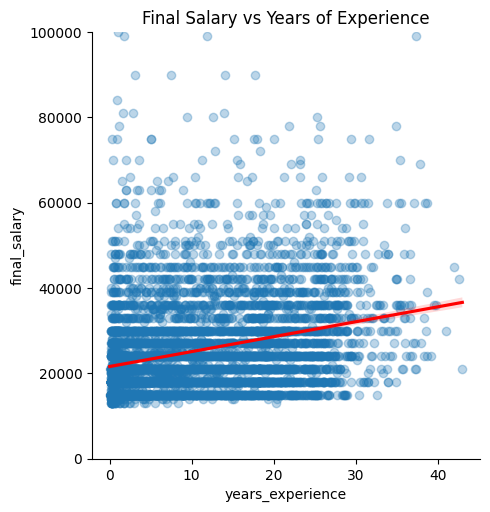

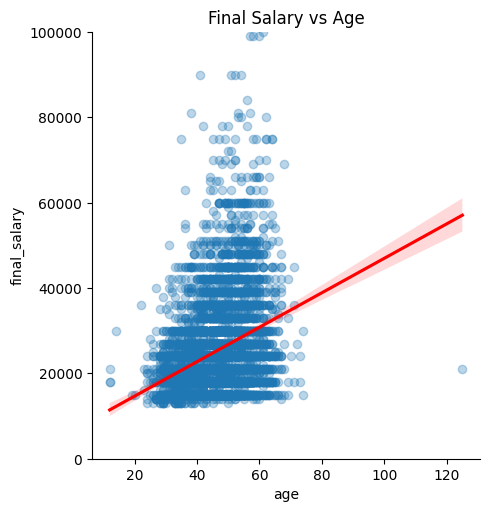

In [37]:
# Scatter: Final Salary vs Years of Experience
sns.lmplot(x='years_experience', y='final_salary', data=df, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.ylim(0, 100000)  # adjust as needed
plt.title("Final Salary vs Years of Experience")
plt.show()

# Scatter: Final Salary vs Age
sns.lmplot(x='age', y='final_salary', data=df, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.ylim(0, 100000)  # adjust as needed
plt.title("Final Salary vs Age")
plt.show()

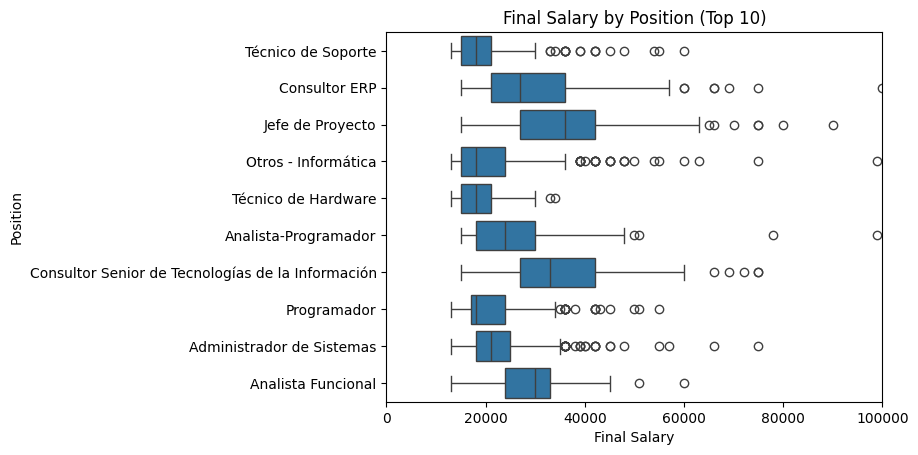

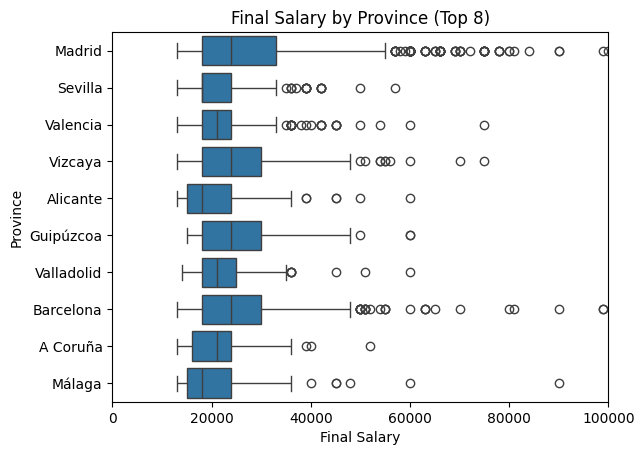

In [34]:
# Final salary by position (Top 10)
top_positions = df['position'].value_counts().head(10).index
plt.figure()
sns.boxplot(data=df[df['position'].isin(top_positions)], x='final_salary', y='position')
plt.xlim(0, 100000)
plt.title("Final Salary by Position (Top 10)")
plt.xlabel("Final Salary")
plt.ylabel("Position")
plt.show()

# Final salary by province (Top 10)
top_provinces = df['province'].value_counts().head(10).index
plt.figure()
sns.boxplot(data=df[df['province'].isin(top_provinces)], x='final_salary', y='province')
plt.xlim(0, 100000)
plt.title("Final Salary by Province (Top 8)")
plt.xlabel("Final Salary")
plt.ylabel("Province")
plt.show()


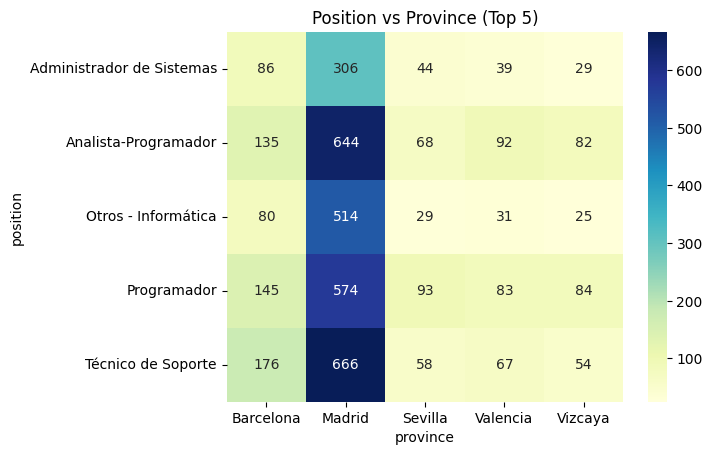

In [35]:
# Position vs Province: top 5 of each
cross_tab = pd.crosstab(
    df[df['position'].isin(df['position'].value_counts().head(5).index)]['position'],
    df[df['province'].isin(df['province'].value_counts().head(5).index)]['province']
)

sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Position vs Province (Top 5)")
plt.show()


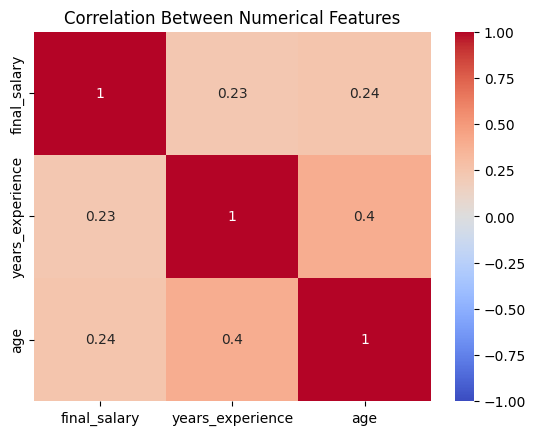

In [36]:
# Correlation heatmap
plt.figure()
numerical_features = ['final_salary', 'years_experience', 'age']
corr = df[numerical_features].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Between Numerical Features")
plt.show()

### Skills

In [38]:
# Let's take a look at skills... which has valuable information, but probably extremely badly formatted.

print(f'Null values in skills: {df["skills"].isna().sum()} null values which are {(df["skills"].isna().sum() / len(df)*100).round()}%')
print("-" * 60)  # separator
print(df['skills'].sample(30))

Null values in skills: 8604 null values which are 62.0%
------------------------------------------------------------
558                                                    NaN
6093     ["Hibernate","MySQL","HTML","NetBeans","Swing"...
5514            ["C","Android","Active Directory","Linux"]
12684    ["Java","Cloudera","Engineering","Big Data","P...
3735                                  ["C","Visual Basic"]
13741                                                  NaN
10118                                                  NaN
2857                                                   NaN
11664                                                  NaN
7340                                                   NaN
4372                                                   NaN
2515                                                   NaN
848                                                    NaN
11044                                                  NaN
8037     ["Java","Internet Explorer","Lotus Notes","SAP..

In [39]:
# They seem to be well spelled... Is this a dropdown?

print(df['skills'][df['skills'].notna()].sample(50))

5552            ["Remedy","Windows Server","Training","C"]
8270     ["Gulp","React","Bootstrap","LinkedIn","R","Wo...
10868    ["ABAP","SAP","C","UML","SQL","Unix","Oracle F...
13834    ["Microsoft Office","Matlab","C","Python","AES...
3811     ["Web Services","MacOS","AWS","Firewalls","Lin...
689                                      ["SAP","Finance"]
13591    ["LinkedIn","Teamwork","DevOps","React","CSS",...
4373                                                 ["C"]
11045    ["Microsoft Office","SAP","LinkedIn","Data","C...
1230     ["Windows Server","CISSP","Linux","Event Manag...
10728    ["R","OpenLDAP","Linux","Microsoft Windows","S...
7053         ["R","Skype","Hardware","Fortran","C","Java"]
9553     ["Firebird","Xamarin","MongoDB","MySQL","DevOp...
13766    ["Data","Data Mining","Microsoft Office 365","...
3786         ["C","Java","Disaster Recovery","Consulting"]
4449     ["SAP HANA","Solutions Design","Applications",...
13658    ["Arduino","HTML","SCADA","SQL","Matlab","SAP".

In [40]:
# How can I prove if they are well spelled or not?
# Simple, the Top 10 skills in count when making it all lower case should be the same. Let's try this.

# Drop NaN and explode the lists into one flat list of skills
# Step 1: Convert string -> list safely
skills_series = df['skills'].dropna().apply(ast.literal_eval)

flat_skills = skills_series.explode().str.strip()

skill_counts = Counter(flat_skills)

top_10_skills = skill_counts.most_common(20)

top_10_skills

[('C', 3711),
 ('SQL', 2150),
 ('Linux', 1669),
 ('Java', 1641),
 ('HTML', 1566),
 ('PHP', 1402),
 ('MySQL', 1219),
 ('CSS', 1166),
 ('R', 1113),
 ('JavaScript', 974),
 ('Microsoft Office', 927),
 ('Management', 910),
 ('SAP', 910),
 ('Marketing', 893),
 ('Android', 824),
 ('Data', 819),
 ('Visual Basic', 759),
 ('XML', 717),
 ('Windows Server', 579),
 ('Python', 578)]

In [41]:
# Now let's try while lowercasing.

skills_series = df['skills'].dropna().apply(ast.literal_eval)

flat_skills = skills_series.explode().str.strip().str.lower()

skill_counts = Counter(flat_skills)

top_10_skills = skill_counts.most_common(20)

top_10_skills

[('c', 3711),
 ('sql', 2150),
 ('linux', 1669),
 ('java', 1641),
 ('html', 1566),
 ('php', 1402),
 ('mysql', 1219),
 ('css', 1166),
 ('r', 1113),
 ('javascript', 974),
 ('microsoft office', 927),
 ('management', 910),
 ('sap', 910),
 ('marketing', 893),
 ('android', 824),
 ('data', 819),
 ('visual basic', 759),
 ('xml', 717),
 ('windows server', 579),
 ('python', 578)]

In [42]:
# It seems to be well spelled. Let's try something else:

unique_raw   = set(df['skills'].dropna().explode())          # original tokens
unique_lower = set(s.lower().strip() for s in unique_raw)    # normalised tokens

if len(unique_raw) == len(unique_lower):
    print("✔️ No case-only duplicates in *any* skill.")
else:
    print("⚠️ There are", len(unique_raw) - len(unique_lower), "case variants.")


✔️ No case-only duplicates in *any* skill.


In [43]:
import ast, re
from collections import Counter

def safe_eval(text):
    """Return a list if text looks like one, else wrap plain string in a list."""
    try:
        value = ast.literal_eval(text)
        return value if isinstance(value, list) else [text]
    except (ValueError, SyntaxError):
        return [text]           # plain string

def split_item(item):
    """Split on common separators inside each list element."""
    # commas, semicolons, slashes, plus signs, ' and ', extra spaces
    return re.split(r'[,+/;&]|(?:\s+and\s+)', item)

# 1. Parse every row safely
parsed = (
    df["skills"]
      .dropna()
      .apply(safe_eval)         # -> list for every row
      .explode()                # flatten column
      .str.strip()
      .str.lower()
)

# 2. Split inner items that still contain multiple skills
clean_tokens = (
    parsed
      .apply(split_item)        # returns list per element
      .explode()                # flatten again
      .str.strip()
)
clean_tokens = clean_tokens[clean_tokens != ""]   # drop empties

# 3. Count
skill_counts = Counter(clean_tokens)
top_10 = skill_counts.most_common(10)

print("Top 10 clean skills:")
for s, c in top_10:
    print(f"{s}: {c}")


Top 10 clean skills:
c: 3711
sql: 2150
linux: 1669
java: 1641
html: 1566
php: 1402
mysql: 1219
css: 1166
r: 1113
javascript: 974


**Findings:**

* Skills is indeed a dropdown... Nobody wrote their skills! They are all unique...
* Does this imply that TF-IDF, or a simple Bag-of-Words would've worked perfectly?

### Skills vs Salary

In [45]:
# Are more skills correlated to more salary? Or the other way around? Or neither?!

df['log_salary'] = np.log1p(df['final_salary']) # I will first log salary to avoid skewness.

   n_skills  final_salary
0         0       18000.0
1         0       21000.0
2         0       42000.0
3         0       18000.0
4         0       36000.0
Mean salary by #skills


,count,mean,median
n_skills,,,
0,3974,24905.888274,21000.0
1,98,22214.285714,18000.0
2,143,23853.146853,18000.0
3,150,25786.666667,20000.0
4,153,25209.150327,20000.0
5,135,21837.037037,20000.0
6,165,26703.030303,21000.0
7,141,22851.063830,21000.0
8,143,24839.160839,21000.0


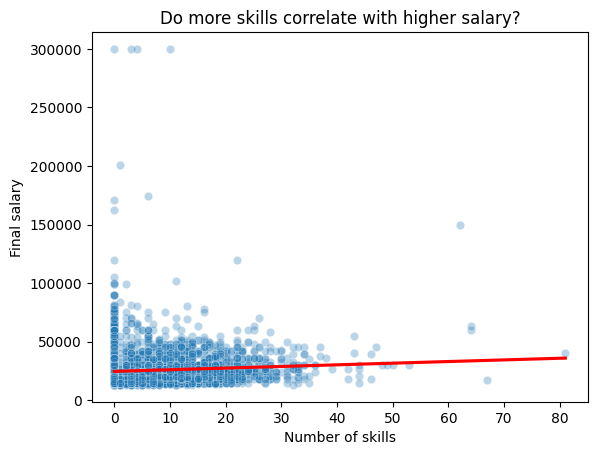

Pearson r = 0.030  (p=0.000351)
Spearman ρ = 0.002  (p=0.782)


In [46]:
# Now I will check tabular(ly), visually, and mathematically.
# Mathematically being the Pearson coefficient.

import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import seaborn as sns   # optional but makes plots nicer

# --- 1. Parse the skills column ------------------------------------------------
# If you already converted the column to real lists, skip this block.
df['skills_list'] = (
    df['skills']
      .fillna("[]")                              # keep NaNs from breaking eval
      .apply(ast.literal_eval)                   # string → list
      .apply(lambda x: x if isinstance(x, list) else [])   # safety
)

# --- 2. Count skills per row ----------------------------------------------------
df['n_skills'] = df['skills_list'].apply(len)

print(df[['n_skills', 'final_salary']].head())

# --- 3. Quick descriptive stats -------------------------------------------------
print("Mean salary by #skills")
display(
    df.groupby('n_skills')['final_salary']
      .agg(['count','mean','median'])
      .sort_index()
      .head(30)                                  # show first few rows
)

# --- 4. Scatter / trend plot ----------------------------------------------------
sns.scatterplot(x='n_skills', y='final_salary', data=df, alpha=0.3)
sns.regplot(x='n_skills', y='final_salary', data=df,
            scatter=False, ci=None, color='red')  # add trend line
plt.xlabel("Number of skills")
plt.ylabel("Final salary")
plt.title("Do more skills correlate with higher salary?")
plt.show()

# --- 5. Correlations ------------------------------------------------------------
pearson = pearsonr(df['n_skills'], df['final_salary'].fillna(0))
spearman = spearmanr(df['n_skills'], df['final_salary'].fillna(0))
print(f"Pearson r = {pearson[0]:.3f}  (p={pearson[1]:.3g})")
print(f"Spearman ρ = {spearman.correlation:.3f}  (p={spearman.pvalue:.3g})")


We can conclude that more skills do not contribute to higher salaries.

### Company

In [65]:
print(f"Unique companies: {df['company'].nunique()}")
print(df['company'].value_counts().head(10))  # Most common
print(df['company'].value_counts().tail(10))  # Rare companies

Unique companies: 12103
company
Accenture    120
Indra         56
Freelance     54
Everis        48
IBM           39
Capgemini     34
Autónomo      30
everis        30
INDRA         30
Coritel       27
Name: count, dtype: int64
company
DxD Deloitte                                                                        1
SERVICIOS INFORMATICOS DE ALAVA, S.A.                                               1
INDRA- CLIENTE RED ELECTRICA DE ESPAÑA                                              1
PROMARSA Marketing & Asociados                                                      1
Ywen S.L.L. (Toledo)                                                                1
GRUPO SOLUTIO- Destinada durante 7 años en la Agencia Tributaria (DIT) de Madrid    1
GAES                                                                                1
Embention                                                                           1
ALBORGIS                                                                    

In [66]:
# Let's input the companies with missing values.

df["company"] = df["company"].fillna("Other") # 200 something.

print("Company nulls after fill:", df["company"].isna().sum())  # Chequear... cuantos NAs tenemos?

Company nulls after fill: 0


In [67]:
# Let's do some manual cleaning

import re
import unicodedata

def strip_accents(text: str) -> str:
    """Remove diacritics, e.g. ‘España’ → ‘Espana’."""
    return "".join(
        ch
        for ch in unicodedata.normalize("NFKD", text)
        if not unicodedata.combining(ch)
    )

def clean_company(name: str) -> str:
    """
    1) Lowercase and strip whitespace
    2) Replace ‘&’ → ‘ and ’
    3) Remove punctuation (commas, periods, parentheses)
    4) Remove common corporate suffixes (‘s.a.’, ‘sa’, ‘s.l.’, etc.) at end
    5) Strip accents
    6) Collapse multiple spaces
    """
    if pd.isna(name) or not name.strip():
        return "others"  # or whatever placeholder you chose

    s = name.lower().strip()
    s = re.sub(r"&", " and ", s)
    s = re.sub(r"[\,\.\(\)]", " ", s)
    # Remove Spanish “S.A.” / “SA” / “S.L.” suffixes at the end:
    s = re.sub(r"\s+(s\.?a\.?|s\.?l\.?)$", "", s)
    s = strip_accents(s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

# Apply:
df["company_clean"] = df["company"].fillna("others").apply(clean_company)

df["company_clean"]

0                                                                                                                                                                                                      studio 21
1                                                                                                                                                                                                      sol melia
2                                                                                                                                                                                            grupo ferrovial s a
3                                                                                                                                                                                                heineken espana
4                                                                                                                                                                   

**Findings:**
* This feature has easily the most amount of typos.
* There is not way we will extract any value from them alone.
* Perhaps we could run an LLM to output industry?
* Could a transformer work?

## Collinearity (Correlation matrix and VIF)

In [81]:
# Let's take a quick sanity check on correlation matrix and VIF scores.
# Is anything collinear?!

In [92]:
# Correlation matrix

num_feats = ['final_salary', 'years_experience', 'age', 'days_last_register', 'n_skills']

corr_matrix = df[num_feats].corr()

print("Correlation matrix:\n", corr_matrix)

Correlation matrix:
                     final_salary  years_experience       age  days_last_register  n_skills
final_salary            1.000000          0.233257  0.242869           -0.036038  0.075960
years_experience        0.233257          1.000000  0.395694            0.180715 -0.051553
age                     0.242869          0.395694  1.000000            0.180275 -0.109400
days_last_register     -0.036038          0.180715  0.180275            1.000000 -0.324455
n_skills                0.075960         -0.051553 -0.109400           -0.324455  1.000000


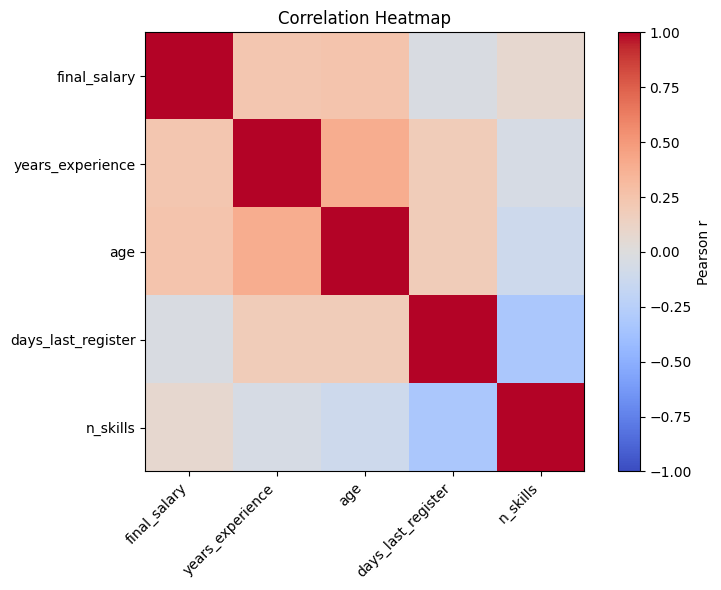

In [94]:
# Correlation matrix map.

plt.figure(figsize=(8, 6))                # square figure for a 5×5 matrix
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Pearson r')
plt.xticks(range(len(num_feats)), num_feats, rotation=45, ha='right')
plt.yticks(range(len(num_feats)), num_feats)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [99]:
num_feats

['final_salary', 'years_experience', 'age', 'days_last_register', 'n_skills']

In [101]:
# Variance Inflator Factor (VIF)?

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_feats = ['years_experience', 'age', 'days_last_register', 'n_skills'] # We can't include final_salary in num_feats.

X = df[vif_feats].dropna()

vif_data = pd.DataFrame({
    'feature': vif_feats,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(len(vif_feats))]
})
print("\nVariance Inflation Factor:\n", vif_data.round(2))


Variance Inflation Factor:
               feature   VIF
0    years_experience  2.65
1                 age  5.96
2  days_last_register  3.92
3            n_skills  1.40


# Feature Engineering

## Skills

**Let's start feature engineering with skills. I have to relevant methods of doing so:**
1. Create clusters -> either of dominant cluster or bag of clusters. this will be large representations of the skills of our observations. 
2. Embed full skills. It might give us additional data per observation. 

/Users/adri/.pyenv/versions/3.10.6/envs/datafest2025/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


977 unique skills after cleaning


Batches: 100%|██████████| 8/8 [00:02<00:00,  3.60it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Silhouette scores: {5: np.float32(0.027290387), 10: np.float32(0.030215679), 15: np.float32(0.029117566), 20: np.float32(0.032496274), 25: np.float32(0.037972543)}
→ using k=25

Top skills per cluster:


cluster
0     aes, antivirus, aruba networks, aws security, ...
1     4nec2, aiops, ansys, anydesk, as2, as3, asp, a...
2     access vba, actionscript, active directory, ac...
3     account management, api management, budget man...
4     apex data loader, azure data factory, big data...
5     activecampaign, acunetix, ada, ahrefs, alfresc...
6     application design, application development, a...
7     abap, abap cds, abap dictionary, abap objects,...
8     3d animation, 3d modeling, 3d printers, 3d pri...
9     ibm aix, oracle application server, oracle bus...
10    2g, 3gpp, 5g, access points, arduino, cisco ro...
11    android, android development, android sdk, and...
12    apache ant, apache camel, apache cordova, apac...
13    advertising, communication skills, consulting,...
14    sap, sap ariba, sap basis, sap business one, s...
15    antimalware, aspectj, atlassian confluence, at...
16    aerospike, alamofire, asana, bower, caffe, cam...
17    ajax, angular, api restful, arcgis


Average salary per cluster:


,count,mean,median
skill_cluster,,,
3,189,40777.78,36000.0
6,76,40516.13,42000.0
9,10,35800.00,40000.0
13,312,29658.73,26500.0
4,219,29030.61,26500.0
14,144,28967.74,26000.0
24,76,28093.75,24500.0
16,97,27224.49,25000.0
7,104,27080.00,24000.0


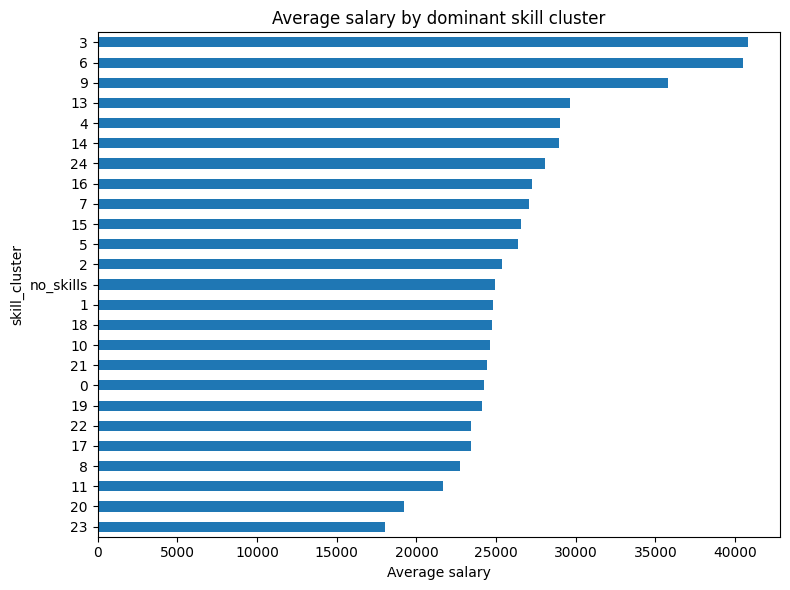

In [47]:
# --------------------------------------------------------------------------------
# 0.  SETUP  ──────────────────────────────────────────────────────────────────────
# --------------------------------------------------------------------------------
!pip install -q sentence-transformers scikit-learn

import ast
import numpy as np
import pandas as pd
from collections import Counter
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans          # straightforward, change to HDBSCAN if you like
from sklearn.metrics import silhouette_score

# --------------------------------------------------------------------------------
# 1.  PARSE & CLEAN SKILLS  ───────────────────────────────────────────────────────
# --------------------------------------------------------------------------------
def to_list(val):
    # safely eval "['Python','SQL']" → ['python','sql']; NaN → []
    if pd.isna(val):
        return []
    try:
        out = ast.literal_eval(val)
        if not isinstance(out, list):
            out = [str(out)]
        return [s.strip().lower() for s in out if s.strip()]
    except Exception:
        return []

df['skills_list'] = df['skills'].apply(to_list)

# quick sanity: how many unique skills?
all_skills = pd.Series(np.concatenate(df['skills_list'].values))
unique_skills = sorted(all_skills.unique())
print(f"{len(unique_skills):,} unique skills after cleaning")

# --------------------------------------------------------------------------------
# 2.  EMBED UNIQUE SKILLS  ────────────────────────────────────────────────────────
# --------------------------------------------------------------------------------
model_name = "sentence-transformers/all-MiniLM-L6-v2"   # fast, English
embedder   = SentenceTransformer(model_name)

skill_vecs = embedder.encode(unique_skills, batch_size=128, show_progress_bar=True)

# --------------------------------------------------------------------------------
# 3.  CHOOSE  k  (optional helper)  ───────────────────────────────────────────────
# --------------------------------------------------------------------------------
# Rough elbow method: silhouette for k in 5..25
scores = {}
for k in range(5, 26, 5):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(skill_vecs)
    scores[k] = silhouette_score(skill_vecs, labels)
print("Silhouette scores:", scores)

k = max(scores, key=scores.get)     # pick best k
print(f"→ using k={k}")

# --------------------------------------------------------------------------------
# 4.  CLUSTER  ────────────────────────────────────────────────────────────────────
# --------------------------------------------------------------------------------
kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
cluster_labels = kmeans.fit_predict(skill_vecs)

skill_to_cluster = dict(zip(unique_skills, cluster_labels))

# helper: inspect each cluster's top tokens
cluster_summary = (
    pd.DataFrame({"skill": unique_skills, "cluster": cluster_labels})
    .groupby("cluster")["skill"]
    .apply(lambda s: ", ".join(s.head(10)))
)
print("\nTop skills per cluster:")
display(cluster_summary)

# --------------------------------------------------------------------------------
# 5.  ASSIGN CANDIDATE TO A “DOMINANT CLUSTER”  ──────────────────────────────────
# --------------------------------------------------------------------------------
def dominant_cluster(skill_list):
    if not skill_list:
        return -1                     # no skills
    clusters = [skill_to_cluster[s]   for s in skill_list]
    # mode cluster for that person
    return Counter(clusters).most_common(1)[0][0]



df['skill_cluster'] = df['skills_list'].apply(dominant_cluster)

# --------------------------------------------------------------------------------
# 6.  AGGREGATE SALARY BY CLUSTER  ────────────────────────────────────────────────
# --------------------------------------------------------------------------------
summary = (
    df.groupby('skill_cluster')['final_salary']
      .agg(count='size', mean='mean', median='median')
      .sort_values('mean', ascending=False)
)

# Relabel cluster -1 for clarity
summary.index = summary.index.where(summary.index != -1, "no_skills")

print("\nAverage salary per cluster:")
display(summary.round(2))

# optional: bar plot
import matplotlib.pyplot as plt
summary['mean'].plot(kind='barh', figsize=(8,6))
plt.xlabel("Average salary")
plt.title("Average salary by dominant skill cluster")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [48]:
# A quick table of “representative” skills for every cluster
top_per_cluster = (
    pd.DataFrame({"skill": unique_skills, "cluster": cluster_labels})
      .groupby("cluster")["skill"]
      .apply(lambda s: ", ".join(s[:15]))        # first 15 skills
)

pd.set_option("display.max_colwidth",  None)   # unlimited column width
pd.set_option("display.width",         2000)   # how many characters a row can show
pd.set_option("display.max_rows",      100)    # if you want to show more clusters too

# now re-display the table
display(top_per_cluster)


cluster
0                                                                                                  aes, antivirus, aruba networks, aws security, azure security, bitcoin, bitlocker, blockchain, cisco meraki, cisco networking, cisco networking academy, cisco technologies, cobit, computer forensics, computer networks
1                                                                                                                                                                                                                   4nec2, aiops, ansys, anydesk, as2, as3, asp, asterisk, c, cissp, civicrm, cocos2d, etl, imap, iso 14001
2                                                                              access vba, actionscript, active directory, activex, altium designer, arcgis, arcgis enterprise, arcgis online, arcgis pro, arcobjects, businessobjects, dynamics 365 business central, entity framework, entity framework core, libreoffice
3                                           

In [49]:
### Here I wanted to explore the idea of bag of clusters, yet it resulted in worst results than dominant clusters. In other words, it was worse at segmenting my data.


# # ─────────────────────────────────────────────────────────────────────────────
# # BAG-OF-CLUSTERS (dummy columns) WITH A CUSTOM THRESHOLD
# # ─────────────────────────────────────────────────────────────────────────────
# #
# # prerequisites already in memory:
# #   • df                – your main DataFrame
# #   • df['skills_list'] – list of cleaned, lower-case skill tokens per row
# #   • skill_to_cluster  – dict {skill → cluster_id}
# #   • n_clusters        – number of skill clusters (k-means or HDBSCAN result)

# # 1 ▸ choose how strict you want the flag
# THRESHOLD = 3          # set to 1, 2, 3 … as you wish
#                        # THRESHOLD = 1 reproduces the "≥1 skill" logic
# print(f"Creating flags: 1 if a candidate has ≥ {THRESHOLD} skill(s) from a cluster")

# # 2 ▸ build a fresh dummy frame ----------------------------------------------
# from collections import Counter
# import pandas as pd
# import numpy as np

# def make_flag_row(skill_list):
#     """Return 0/1 flags for every cluster (plus -1 for no skills)."""
#     counts = Counter(skill_to_cluster[s] for s in skill_list)
#     row = {f"cluster_{k}": int(counts.get(k, 0) >= THRESHOLD)
#            for k in range(n_clusters)}
#     row["cluster_-1"] = int(len(skill_list) == 0)   # no skills flag
#     return row

# cluster_dummies = df["skills_list"].apply(make_flag_row).apply(pd.Series)

# # 3 ▸ replace old cluster_* columns (if any) and join -------------------------
# df = df.drop(columns=df.filter(regex=r"^cluster_").columns) \
#        .join(cluster_dummies)

# print("Dummy matrix shape:", cluster_dummies.shape)
# print("Example row:\n", cluster_dummies.head(1).T)

# # 4 ▸ median salary for "has ≥ THRESHOLD skills in cluster k" -----------------
# median_by_presence = (
#     df.filter(regex=r"^cluster_")                       # the flag columns only
#       .apply(lambda col: df.loc[col == 1, "final_salary"].median())
#       .sort_values(ascending=False)
#       .rename("median_salary")
# )

# # add profile counts for context
# count_by_presence = (
#     df.filter(regex=r"^cluster_")
#       .apply(np.sum)                                   # how many rows have flag==1
#       .rename("n_profiles")
# )

# summary = pd.concat([median_by_presence, count_by_presence], axis=1)
# display(summary)


In [50]:
# # list of cluster IDs present in each row
# df["clusters_present"] = df["skills_list"].apply(
#     lambda lst: sorted({skill_to_cluster[s] for s in lst}) if lst else [-1]
# )

# # explode → wide pivot → 0/1 columns
# cluster_dummies = (
#     df[["uuid", "clusters_present"]]
#       .explode("clusters_present")
#       .assign(val=1)
#       .pivot_table(index="uuid",
#                    columns="clusters_present",
#                    values="val",
#                    fill_value=0)
#       .add_prefix("cluster_")        # e.g. cluster_3, cluster_-1
# )

# # join back to main frame
# df = df.join(cluster_dummies, on="uuid")

In [51]:
# # mean salary for anyone having at least one skill in each cluster
# mean_by_presence = {
#     c: df.loc[df[f"cluster_{c}"] == 1, "final_salary"].mean()
#     for c in cluster_dummies.columns.str.replace("cluster_", "").astype(int)
# }
# pd.Series(mean_by_presence).sort_values(ascending=False)


In [53]:
# # mean salary for anyone having at least one skill in each cluster
# median_by_presence = {
#     c: df.loc[df[f"cluster_{c}"] == 1, "final_salary"].median()
#     for c in cluster_dummies.columns.str.replace("cluster_", "").astype(int)
# }
# pd.Series(median_by_presence).sort_values(ascending=False)


In [54]:
median_dom = (
    df.groupby('skill_cluster')['final_salary']
      .agg(median='median', n='size')
      .sort_values('median', ascending=False)
)

display(median_dom)


,median,n
skill_cluster,,
6,42000.0,76
9,40000.0,10
3,36000.0,189
15,27000.0,59
4,26500.0,219
13,26500.0,312
14,26000.0,144
16,25000.0,97
24,24500.0,76


In [56]:
df['skills'].sample(10)

6559                                                                                                                                                                                                                                                                                                                                 NaN
13043                                                                                                                                                                                                                                                                       ["Microsoft Office","PHP","SQL","PostgreSQL","Visual Basic"]
10863                                                                                                                                                                                                                                                                                                                                NaN
4032         

**Findings:**
* More skills =/= More salary.
* Clusters seem to tell us something about salary... Indeed there is a diff. But how do we apply these to every candidate?
  * We can get a dominant cluster for each.
  * Or use bag of words of clustering for each.
  * I will try modelling with each. 

**Let's include embeddings per salary**

In [59]:
from itertools import chain

all_skills = df['skills'].dropna().apply(lambda x: [s.strip().lower() for s in str(x).split(',')])
flat_skills = list(chain.from_iterable(all_skills))
print(f"Unique skills: {len(set(flat_skills))}")
print(sorted(set(flat_skills))[:50])  # Peek at the first 50

Unique skills: 2028
['"2g"', '"2g"]', '"3d animation"', '"3d animation"]', '"3d modeling"', '"3d printers"', '"3d printing"', '"3gpp"', '"3gpp"]', '"4nec2"', '"5g"', '"5g"]', '"ab initio"', '"abap cds"', '"abap dictionary"', '"abap objects"', '"abap oo"', '"abap oo"]', '"abap"', '"abap"]', '"ableton live"', '"acceptance testing"', '"access points"', '"access vba"', '"account management"', '"actionscript"', '"actionscript"]', '"active directory"', '"active directory"]', '"active record"', '"activecampaign"]', '"activex"', '"acunetix"', '"ada"', '"ada"]', '"adobe acrobat pro"', '"adobe acrobat pro"]', '"adobe acrobat"', '"adobe after effects"', '"adobe after effects"]', '"adobe air"', '"adobe animate"', '"adobe audition"', '"adobe audition"]', '"adobe bridge"', '"adobe captivate"', '"adobe connect"', '"adobe creative cloud"', '"adobe dreamweaver"', '"adobe dreamweaver"]']


In [60]:
df['has_skills'] = df['skills'].notna().astype(int)
print(df.groupby('has_skills')['final_salary'].describe())

             count          mean           std      min      25%      50%      75%       max
has_skills                                                                                  
0           3974.0  24905.888274  12018.661576  13000.0  18000.0  21000.0  30000.0  300000.0
1           2402.0  25571.190674  15623.676306  13000.0  18000.0  21000.0  30000.0  300000.0


In [61]:
# Funcion clasica para limpiar

import re

def clean_skills(text):
    if pd.isna(text):
        return ''
    text = text.lower()
    text = re.sub(r'[\[\]"]', '', text)  # remove brackets and quotes
    text = re.sub(r'\s*,\s*', ', ', text)  # ensure clean spacing around commas
    return text.strip()

In [62]:
df['skills_clean'] = df['skills'].apply(clean_skills)

In [ ]:
# The model will be using is an SBERT model, in order to capture some sort of semantic from skills feature.
!pip install sentence_transformers
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('distiluse-base-multilingual-cased-v2') # modelo en español.

In [64]:
skills_texts = df['skills_clean'].tolist()
skills_embeddings = model.encode(skills_texts, show_progress_bar=True)

skills_emb_df = pd.DataFrame(skills_embeddings, columns=[f'skills_emb_{i}' for i in range(skills_embeddings.shape[1])])
df = pd.concat([df.reset_index(drop=True), skills_emb_df], axis=1)

Batches: 100%|██████████| 436/436 [00:33<00:00, 13.08it/s]


## Title

In [57]:
# The most important thing is that I'd like to analyze if title is well formatted. It seems not.

df.title.sample(20)

# this already proved it, badly formatted:
# 257 Programador  | Profesor Grado Superior Informática y Programador | Programador  | Programador | Programador .NET | Programador | Programador/Analista | Jefa de proyectos | Programador /analista | Programador/Analista

# Perhaps basic clean -> embeddings. Followed by clustering?

10787                                                                                                                                                                                                                                        Analista | Analista | Analista | Analista | Analista Funcional | Analista | Analista Funcional | Analista  | Analista
148                                                                                                                                                                                                                                                                                                                        Técnico de redes | Tecnico de sistemas.
7060                                                                                                                                 Administrador de sistemas | Administrador de Sistemas | IT Manager | Administrador de Sistemas | Técnico de sistemas | Operador Informático | Administrador d

In [102]:
# --------------------------------------------------------------------------------
# 0.  SETUP  (reuse the same SBERT model if you already loaded it) ────────────────
# --------------------------------------------------------------------------------
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from collections import Counter
import pandas as pd
import numpy as np
import ast

model_name = "sentence-transformers/all-MiniLM-L6-v2"
embedder   = SentenceTransformer(model_name)   # will skip download if already cached

# --------------------------------------------------------------------------------
# 1.  PARSE & CLEAN TITLES  ──────────────────────────────────────────────────────
# --------------------------------------------------------------------------------
def title_to_list(val):
    """
    Convert raw title strings such as
    "Analista | Analista Funcional | Programador"
    into ['analista', 'analista funcional', 'programador'].
    NaN → [].
    """
    if pd.isna(val):
        return []
    # split on pipe, comma, or semicolon
    parts = [p.strip().lower() for p in str(val).split('|')]
    return [p for p in parts if p]          # drop empty strings

df['title_list'] = df['title'].apply(title_to_list)

# --------------------------------------------------------------------------------
# 2.  EMBED UNIQUE TITLES  ───────────────────────────────────────────────────────
# --------------------------------------------------------------------------------
all_titles     = pd.Series(np.concatenate(df['title_list'].values))
unique_titles  = sorted(all_titles.unique())

title_vecs = embedder.encode(unique_titles, batch_size=128, show_progress_bar=True)

# --------------------------------------------------------------------------------
# 3.  PICK k VIA SILHOUETTE  ─────────────────────────────────────────────────────
# --------------------------------------------------------------------------------
sil = {}
for k in range(5, 26, 5):                           # try 5,10,15,20,25
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(title_vecs)
    sil[k] = silhouette_score(title_vecs, labels)
best_k = max(sil, key=sil.get)
print(f"Best k for titles = {best_k}")

# --------------------------------------------------------------------------------
# 4.  CLUSTER TITLES  ────────────────────────────────────────────────────────────
# --------------------------------------------------------------------------------
km_titles = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
title_labels = km_titles.fit_predict(title_vecs)

title_to_cluster = dict(zip(unique_titles, title_labels))

# Optional: quick peek at top titles per cluster
title_summary = (
    pd.DataFrame({"title": unique_titles, "cluster": title_labels})
      .groupby("cluster")["title"]
      .apply(lambda s: ", ".join(s.head(8)))
)
print("\nTop titles per cluster:")
print(title_summary)

# --------------------------------------------------------------------------------
# 5.  ASSIGN EACH CANDIDATE A “DOMINANT TITLE CLUSTER” ───────────────────────────
# --------------------------------------------------------------------------------
def dominant_title_cluster(title_list):
    if not title_list:
        return -1                        # flag for missing titles
    clusters = [title_to_cluster[t] for t in title_list if t in title_to_cluster]
    return Counter(clusters).most_common(1)[0][0]

df['title_cluster'] = df['title_list'].apply(dominant_title_cluster)

# --------------------------------------------------------------------------------
# 6.  (OPTIONAL) CHECK SALARY BY TITLE CLUSTER  ──────────────────────────────────
# --------------------------------------------------------------------------------
title_salary = (
    df.groupby('title_cluster')['final_salary']
      .agg(count='size', mean='mean', median='median')
      .sort_values('mean', ascending=False)
      .rename(index={-1: 'no_title'})
)
print("\nAverage salary per title cluster:")
print(title_salary.round(2))


Batches: 100%|██████████| 138/138 [00:17<00:00,  7.80it/s]


Best k for titles = 10

Top titles per cluster:
cluster
0                                                                                                                                                                                                                                                                                                                                       &#61607;\tanalista en la agencia tributaria (aeat), &#61607;\tanalista en la empresa thales raytheon (paris), &#61607;\tbecario en la empresa thomson csf ncs (paris), -, 19f, 70, 71, 72
1                                                                                                                                                                     &#61607;\tanalista programador en la empresa telefonica moviles, &#61607;\tanalista programador en la empresa thomson csf airsys (paris), -\tconsultor junior, -\tresponsable de infraestructura y seguridad, - administrador de ventas para empresa, - lider de proyect

In [104]:
df['title_cluster'].value_counts()

title_cluster
 8    1867
 9    1827
 6    1739
 0    1693
 7    1664
 1    1598
 5    1506
 3    1028
 2     670
 4     345
-1      11
Name: count, dtype: int64

In [106]:
# Let's check how well this clusters split our data!

# --- Median log-salary (and raw salary) by title cluster -----------------
summary = (
    df.groupby('title_cluster')
      .agg(
          n                   = ('log_salary', 'size'),
          median_log_salary   = ('log_salary', 'median'),
          median_salary       = ('final_salary', 'median')   # optional
      )
      .sort_values('median_log_salary', ascending=False)
      .rename(index={-1: 'no_title'})        # relabel the missing-title bucket
)

print(summary.round(2))

                  n  median_log_salary  median_salary
title_cluster                                        
1              1598              10.20        27000.0
4               345              10.20        27000.0
5              1506              10.20        27000.0
8              1867              10.20        27000.0
3              1028              10.04        23000.0
0              1693               9.95        21000.0
2               670               9.95        21000.0
6              1739               9.90        20000.0
no_title         11               9.80        18000.0
7              1664               9.80        18000.0
9              1827               9.80        18000.0


In [ ]:
box = (
    df.groupby("title_cluster")["final_salary"]
      .describe(percentiles=[.25,.5,.75])    # gives count, mean, std, min, 25%, 50%, 75%, max
      .loc[:, ["25%", "50%", "75%"]]
      .sort_values("50%", ascending=False)
)
print(box.head(10))

                   25%      50%      75%
title_cluster                           
 1             20000.0  27000.0  36000.0
 4             21000.0  27000.0  36000.0
 5             21000.0  27000.0  33000.0
 8             20000.0  27000.0  38000.0
 3             18000.0  23000.0  30000.0
 0             18000.0  21000.0  27000.0
 2             18000.0  21000.0  24000.0
 6             18000.0  20000.0  24000.0
-1             17250.0  18000.0  18000.0
 7             15000.0  18000.0  22000.0


Title clusters split our data well.
I would suggest also embedding the full string and f it. 

In [ ]:
# ------------------------------------------------------------------
# 1.  Basic median salary by title cluster
# ------------------------------------------------------------------
median_salary = (
    df.groupby("title_cluster")["final_salary"]
      .median()
      .rename("median_salary")
      .sort_values(ascending=False)
)

print("Median FINAL_SALARY by title_cluster:")
display(median_salary)

# ------------------------------------------------------------------
# 2.  (Optional) median of log‐transformed salary
#     Use this if salary is highly skewed and you want a
#     normalized central tendency (e.g., for box-cox or plotting).
# ------------------------------------------------------------------
if "log_salary" in df.columns:
    median_log = (
        df.groupby("title_cluster")["log_salary"]
          .median()
          .rename("median_log_salary")
          .sort_values(ascending=False)
    )
    print("\nMedian LOG_SALARY by title_cluster:")
    display(median_log)


Median FINAL_SALARY by title_cluster:


title_cluster
 0    21000.0
 1    21000.0
 2    21000.0
 3    21000.0
 4    21000.0
-1        NaN
Name: median_salary, dtype: float64


Median LOG_SALARY by title_cluster:


title_cluster
 0    9.952325
 1    9.952325
 2    9.952325
 3    9.952325
 4    9.952325
-1         NaN
Name: median_log_salary, dtype: float64

**Conclusion:**

What should we do with the linguistic features? It depends!

## Last registry

In [ ]:
df['last_register'] = pd.to_datetime(df['last_register'], errors='coerce').dt.year

## Province & Comunidad

In [ ]:
df['skills'].isnull().sum()

np.int64(8604)

In [ ]:
# Diccionario con comunidades.

prov_to_ccaa = {
    'Álava': 'País Vasco',
    'Albacete': 'Castilla-La Mancha',
    'Alicante': 'Comunidad Valenciana',
    'Almería': 'Andalucía',
    'Asturias': 'Principado de Asturias',
    'Ávila': 'Castilla y León',
    'Badajoz': 'Extremadura',
    'Barcelona': 'Cataluña',
    'Burgos': 'Castilla y León',
    'Cáceres': 'Extremadura',
    'Cádiz': 'Andalucía',
    'Cantabria': 'Cantabria',
    'Castellón': 'Comunidad Valenciana',
    'Ciudad Real': 'Castilla-La Mancha',
    'Córdoba': 'Andalucía',
    'Cuenca': 'Castilla-La Mancha',
    'Girona': 'Cataluña',
    'Granada': 'Andalucía',
    'Guadalajara': 'Castilla-La Mancha',
    'Guipúzcoa': 'País Vasco',
    'Huelva': 'Andalucía',
    'Huesca': 'Aragón',
    'Islas Baleares': 'Islas Baleares',
    'Jaén': 'Andalucía',
    'La Rioja': 'La Rioja',
    'Las Palmas': 'Canarias',
    'León': 'Castilla y León',
    'Lleida': 'Cataluña',
    'Lugo': 'Galicia',
    'Madrid': 'Comunidad de Madrid',
    'Málaga': 'Andalucía',
    'Melilla': 'Melilla',
    'Murcia': 'Región de Murcia',
    'Navarra': 'Navarra',
    'Ourense': 'Galicia',
    'Palencia': 'Castilla y León',
    'Pontevedra': 'Galicia',
    'Salamanca': 'Castilla y León',
    'Santa Cruz de Tenerife': 'Canarias',
    'Segovia': 'Castilla y León',
    'Sevilla': 'Andalucía',
    'Soria': 'Castilla y León',
    'Tarragona': 'Cataluña',
    'Teruel': 'Aragón',
    'Toledo': 'Castilla-La Mancha',
    'Valencia': 'Comunidad Valenciana',
    'Valladolid': 'Castilla y León',
    'Vizcaya': 'País Vasco',
    'Zamora': 'Castilla y León',
    'Zaragoza': 'Aragón'
}

In [ ]:
df['comunidad'] = df['province'].map(prov_to_ccaa)

In [ ]:
df.groupby('comunidad')['final_salary'].mean().sort_values(ascending=False)

In [ ]:
# Agrupación y conteo
counts = df['comunidad'].value_counts().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(12, 6))
counts.plot(kind='bar', edgecolor='black')
plt.title('Número de registros por comunidad autónoma')
plt.xlabel('Comunidad Autónoma')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# por que 900!?!?!?!?!?
# Umbral mínimo para considerar comunidad significativa ...
umbral = 500

# Obtener conteo de comunidades
comunidad_counts = df['comunidad'].value_counts()

# Crear nueva columna con agrupación
df['comunidad'] = df['comunidad'].apply(
    lambda x: x if pd.notnull(x) and comunidad_counts.get(x, 0) >= umbral else 'Otros'
)

In [ ]:
df['comunidad']

In [ ]:
# Nuevo conteo
counts_agrupados = df['comunidad'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
counts_agrupados.plot(kind='bar', edgecolor='black', color='steelblue')
plt.title('Número de registros por comunidad autónoma (agrupado)')
plt.xlabel('Comunidad Autónoma')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
def limpiar_columna(col):
    if col.startswith('comunidad_'):
        nombre = col.replace('comunidad_', '')
        # Quitar tildes
        nombre = unicodedata.normalize('NFKD', nombre).encode('ascii', 'ignore').decode('utf-8')
        # Reemplazar espacios y guiones por guiones bajos, bajar todo a minúsculas
        nombre = re.sub(r'[^a-zA-Z0-9]', '_', nombre).lower()
        # Evitar múltiples guiones bajos seguidos
        nombre = re.sub('_+', '_', nombre).strip('_')
        return f"comunidad_{nombre}"
    return col

In [ ]:
df = pd.get_dummies(df, columns=['comunidad'], prefix='comunidad', drop_first=False)

# Aplicar a nombres de columnas
df.columns = [limpiar_columna(col) for col in df.columns]

In [ ]:
df.columns

## Company

In [ ]:
!python -mspacy download es_core_news_sm # descargarnos spaCy para limpiar bien.
import spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 37.4 MB/s eta 0:00:00 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
nlp = spacy.load("es_core_news_sm") # modelo de ESP.

# Función para limpiar company.
def spacy_clean(text):
    if not text or pd.isna(text):
        return ''

    doc = nlp(text.lower().strip())

    # dejamos solamente valores alphanumericos.
    tokens = [token.text for token in doc if token.is_alpha or token.is_digit]

    return ' '.join(tokens)

In [ ]:
# Aplicamos funcion a columna

df['company_clean'] = df['company'].apply(spacy_clean)

In [ ]:
# Iniciamos modelo y vemos que tal.

model = SentenceTransformer('distiluse-base-multilingual-cased-v2') # modelo en español.

texts = df['company_clean'].astype(str).tolist() # pasamos todas las companias a una lista para crear los embeddings.

# Genera embeddings!
embeddings = model.encode(texts, show_progress_bar=True)

In [ ]:
# Join al df.

# Convert to DataFrame
emb_df = pd.DataFrame(embeddings, columns=[f'company_emb_{i}' for i in range(embeddings.shape[1])])

# Merge with original df
df = pd.concat([df.reset_index(drop=True), emb_df], axis=1)

In [ ]:
# al parecer los datos parecen muy bien formateados. Deben de ser elegidos y no escritos probablemente.

# Limpiemos pero muy muy basico.
def spacy_clean_position(text):
    if not text or pd.isna(text):
        return ''

    doc = nlp(text.strip().lower())  # lowercase + remove leading/trailing spaces

    # Keep only words (no punctuation, no stopwords, etc.)
    tokens = [token.text for token in doc if token.is_alpha]

    return ' '.join(tokens)

In [ ]:
df['position_clean'] = df['position'].apply(spacy_clean_position)

In [ ]:
# Encode position_clean using the same multilingual model
position_texts = df['position_clean'].astype(str).tolist()

position_embeddings = model.encode(position_texts, show_progress_bar=True)

In [ ]:
# Join

position_emb_df = pd.DataFrame(position_embeddings, columns=[f'position_emb_{i}' for i in range(position_embeddings.shape[1])])

df = pd.concat([df.reset_index(drop=True), position_emb_df], axis=1)

## Title

In [ ]:
def spacy_clean_title_with_commas(text):
    if not text or pd.isna(text):
        return ''

    # Normalize weird separators before spaCy
    text = text.replace('|', ',')
    text = text.replace('/', ',')
    text = text.replace(' - ', ',')  # only where dash is used like a list separator

    doc = nlp(text.lower().strip())

    # Lemmatize and keep alpha tokens or commas
    tokens = []
    for token in doc:
        if token.is_alpha:
            tokens.append(token.lemma_)
        elif token.text == ',':
            tokens.append(',')

    return ' '.join(tokens)

In [ ]:
df['title_clean'] = df['title'].apply(spacy_clean_title_with_commas)
df['title_clean']

In [ ]:
df['title_clean'].head(50)

In [ ]:
# Again, transformers.

title_texts = df['title_clean'].tolist()
title_embeddings = model.encode(title_texts, show_progress_bar=True)

In [ ]:
title_emb_df = pd.DataFrame(title_embeddings, columns=[f'title_emb_{i}' for i in range(title_embeddings.shape[1])])
df = pd.concat([df.reset_index(drop=True), title_emb_df], axis=1)

## Skills

In [ ]:
from itertools import chain

all_skills = df['skills'].dropna().apply(lambda x: [s.strip().lower() for s in str(x).split(',')])
flat_skills = list(chain.from_iterable(all_skills))
print(f"Unique skills: {len(set(flat_skills))}")
print(sorted(set(flat_skills))[:50])  # Peek at the first 50

In [ ]:
df['has_skills'] = df['skills'].notna().astype(int)
print(df.groupby('has_skills')['final_salary'].describe())

In [ ]:
# Funcion clasica para limpiar

import re

def clean_skills(text):
    if pd.isna(text):
        return ''
    text = text.lower()
    text = re.sub(r'[\[\]"]', '', text)  # remove brackets and quotes
    text = re.sub(r'\s*,\s*', ', ', text)  # ensure clean spacing around commas
    return text.strip()

In [ ]:
df['skills_clean'] = df['skills'].apply(clean_skills)

In [ ]:
skills_texts = df['skills_clean'].tolist()
skills_embeddings = model.encode(skills_texts, show_progress_bar=True)

skills_emb_df = pd.DataFrame(skills_embeddings, columns=[f'skills_emb_{i}' for i in range(skills_embeddings.shape[1])])
df = pd.concat([df.reset_index(drop=True), skills_emb_df], axis=1)